## Basic Codes for Eye Model

基本的介绍参见附上的文档"EYE-Model(1)" and "EYE-Model(2)"

For basic introduction to what the program is doing, see"EYE-Model(1)" and "EYE-Model(2)"

In [1]:
from vMPS_pack import *
import numpy as np
import matplotlib.pyplot as plt

### MPO Constructing

In [2]:
def GetMpo_EYE(Dp,Omega,Delta,sqrtV):     #### Default: Dp=2
    w = Omega
    d = Delta
    I, Sp, Sm, Z, X, Y = Sub.SpinOper(Dp)
    Z*=2
    X*=2
    Y*=2
    n = np.array([[1,0],[0,0]])
    N = sqrtV*n
    P = np.array([[0,0],[0,1]])
    Dmpo = 6
    M = w*X + d*Z
    Mpo = [np.zeros((Dmpo, Dp, Dmpo, Dp)) for _ in range(6)]
    
    for i in range(6):
        Mpo[i][0,:,0,:] = I
        Mpo[i][5,:,5,:] = I
        Mpo[i][0,:,5,:] = M
        
    Mpo[0][0,:,1,:] = N
    Mpo[0][0,:,2,:] = N
    Mpo[0][2,:,2,:] = I
    Mpo[0][3,:,5,:] = N
    Mpo[0][1,:,1,:] = I
    
    Mpo[1][0,:,1,:] = N
    Mpo[1][0,:,2,:] = N
    Mpo[1][0,:,3,:] = N
    Mpo[1][1,:,1,:] = I
    Mpo[1][2,:,5,:] = N
    
    Mpo[2][0,:,2,:] = N
    Mpo[2][0,:,3,:] = N
    Mpo[2][1,:,5,:] = N
    Mpo[2][2,:,2,:] = I
    Mpo[2][3,:,3,:] = I
    
    Mpo[3][0,:,1,:] = N
    Mpo[3][0,:,2,:] = N
    Mpo[3][0,:,3,:] = N
    Mpo[3][0,:,4,:] = N
    Mpo[3][2,:,2,:] = I
    Mpo[3][3,:,5,:] = N
    
    Mpo[4][0,:,2,:] = N
    Mpo[4][0,:,3,:] = N
    Mpo[4][0,:,4,:] = N
    Mpo[4][1,:,1,:] = I
    Mpo[4][2,:,5,:] = N
    Mpo[4][3,:,3,:] = I
    Mpo[4][4,:,4,:] = I
    
    Mpo[5][0,:,1,:] = N
    Mpo[5][0,:,2,:] = N
    Mpo[5][0,:,3,:] = N
    Mpo[5][1,:,1,:] = I
    Mpo[5][2,:,2,:] = I
    Mpo[5][3,:,3,:] = I
    Mpo[5][4,:,5,:] = N
    
    return Mpo

### Basic using

In [11]:
# Choose your parameters
Dp = 2
Ds = 4
Ds2 = 10
Omega = 1.0

# Delta = -10, Ns = 180
Mpo= GetMpo_EYE(Dp,Omega,-10,10)
T = InitMps(180,Dp,Ds)
HL,HR = IniH(Mpo,T)
T,Energy= OptT(Mpo,HL,HR,T)
print('When delta = -10, Energy per site is',Energy)

# Delta = 10, Ns = 180
Mpo= GetMpo_EYE(Dp,Omega,10,10)
T = InitMps(180,Dp,Ds)
HL,HR = IniH(Mpo,T)
T,Energy= OptT(Mpo,HL,HR,T)
print('When delta = 10, Energy per site is',Energy)

When delta = -10, Energy per site is 4.866597267237716
When delta = 10, Energy per site is -10.049393955846066


对于平凡基态（delta<0）：
可以认为V不起作用（毕竟V不过是一个PXP的等价物）。有限的delta会导致结果偏离理想的预期（也就是全是down state）。
delta是唯一的限制因素。
很容易验证，当delta变大的时候，基态也会越来越接近理论的基态（all down）

对于非平凡的基态（delta>0）:
此时，理想的情况是1/4覆盖，期望的能量是delta的一半————此时的限制因素是delta和系统尺度Ns
系统尺度Ns是最大的限制（可能换成周期性边界条件（这是容易实现的）会好一点，不过这个程序跑得很快，Ns=1200也就跑44秒）

发现了ys的程序里面的小问题：U会累积所有的非零元，以至于变大，变成inf（当Ns很大时）——————解决：使用最大元素归一化


#### **For Trivial Ground State (delta > 0):**

It can be considered that V has no effect (after all, V is equivalent to a PXP). A finite delta will cause the results to deviate from the ideal expectation (which is all down states).
Delta is the only limiting factor.
It is easy to verify that as delta increases, the ground state will get closer and closer to the theoretical ground state (all down).

#### **For Non-Trivial Ground State (delta < 0):**

In this case, the ideal situation is 1/4 coverage, and the expected energy is half of delta. The limiting factors here are delta and the system size Ns.
The system size Ns is the biggest constraint (possibly switching to periodic boundary conditions, which is easy to implement, might help. However, this program runs very fast, with Ns=1200 taking only 44 seconds).

##### Issue Found in Prof Shuo Yang's Program:

U accumulates all non-zero elements, causing it to grow and become inf (when Ns is large).
Solution: Use normalization by the maximum element.

### 绘图：纠缠熵随序参量的变化

Entanglement Entropy vs Delta(detuning)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


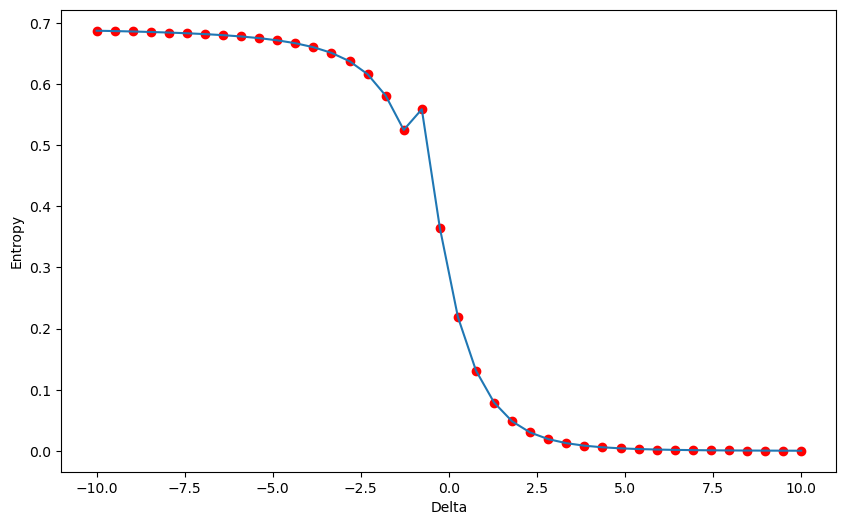

-------------------------------------------


In [ ]:
sequence = np.linspace(-10, 10, 40)
sequence_reversed = sequence[::-1] # 反转序列

i = 0

entropy_list = []
energy_list = []
for Delta in sequence_reversed:
    print(i)
    i += 1
    Ns = 24
    Dp = 2
    Ds = 6
    Omega = 1.0
    Mpo = GetMpo_EYE(Dp, Omega, Delta, 15)
    T = InitMps(Ns, Dp, Ds)
    HL, HR = IniH(Mpo, T)
    T, Energy = OptT(Mpo, HL, HR, T)
    energy_list.append(Energy)     # 记录能量,如果需要的话，可以画出能量图像
    entropy_list.append(Entropy_calculation(T,12))

plt.figure(figsize=(10, 6))
plt.plot(sequence_reversed, entropy_list)
plt.scatter(sequence_reversed, entropy_list, color='red', label='Sample Points')
plt.xlabel('Delta')
plt.ylabel('Entropy')
plt.show()
print('-------------------------------------------')


### Spatial distribution of ENtanglement entropy at different Delta

In [ ]:
Ns = 144
Dp = 2
Ds = 6
Omega = 1.0
delta_values = [-10,-1.24,-1,-0.98,-0.8, -0.5,1]
range0 = range(1, Ns)

# 创建一个图形
plt.figure(figsize=(10, 6))
entro_family = []
i= 0
# 遍历不同的 Delta 值
for Delta in delta_values:
    i+=1
    print('Time:', i)
    entropy_sum = []
    for N in range0:
        Mpo = GetMpo_EYE(Dp, Omega, Delta, 15)
        T = InitMps(Ns, Dp, Ds)
        HL, HR = IniH(Mpo, T)
        T, Energy = OptT(Mpo, HL, HR, T)
        entropy_sum.append(Entropy_calculation(T, N))
        
    entro_family.append(entropy_sum)
    # 绘制曲线
    plt.plot(range0, entropy_sum, label=f'Delta = {Delta}')

# 添加图例和标签
plt.xlabel('N')
plt.ylabel('Entropy')
plt.title('Entropy vs N for Different Delta Values')
plt.legend()
plt.grid(True)
plt.show()

### 通过$\sigma_z$，判断我们得到的state

Understanding the ground state by calculating $\sigma_z$

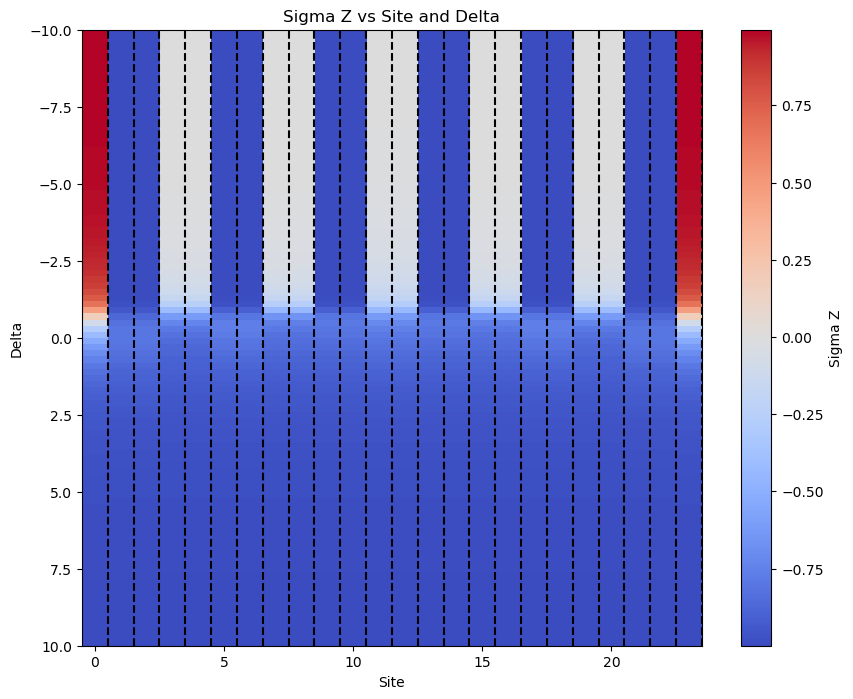

In [13]:
Ns = 24
Dp = 2
Ds = 8
Omega = 1.0

# 生成 Delta 的范围
delta_values = np.linspace(-10, 10, 100)

# 初始化存储 sigma_z 值的二维数组
sigma_z_matrix = np.zeros((len(delta_values), Ns))

# 计算每个 Delta 和每个 i 处的 sigma_z 值
for delta_idx, Delta in enumerate(delta_values):
    Mpo = GetMpo_EYE(Dp, Omega, Delta, 15)
    T = InitMps(Ns, Dp, Ds)
    HL, HR = IniH(Mpo, T)
    T, Energy = OptT(Mpo, HL, HR, T)
    
    for i in range(Ns):
        sigma_z = calculate_sigmaz(T, i)
        sigma_z_matrix[delta_idx, i] = sigma_z

# 绘制热图
plt.figure(figsize=(10, 8))
plt.imshow(sigma_z_matrix, aspect='auto', cmap='coolwarm', extent=[-0.5, Ns-0.5, 10, -10])
plt.colorbar(label='Sigma Z')
plt.xlabel('Site')
plt.ylabel('Delta')
plt.title('Sigma Z vs Site and Delta')

# 在每个 i + 0.5 的位置添加黑色虚线
for i in range(Ns):
    plt.axvline(x=i + 0.5, color='black', linestyle='--')

plt.show()

### 计算$\sigma_z$的均值和方差

In [ ]:
# 计算每个 delta 对应的 sigma_z 平均值和方差（不包括首尾两个 i）
sigma_z_avg = np.mean(sigma_z_matrix[:, 1:-1], axis=1)
sigma_z_avg += 1
sigma_z_avg /= 2
sigma_z_var = np.var(sigma_z_matrix[:, 1:-1], axis=1)

# 找到第一次相邻的 var 值之间相差超过 0.02 的 delta 值
threshold = 0.02
delta_threshold = None
for i in range(len(sigma_z_var) - 1):
    if abs(sigma_z_var[i + 1] - sigma_z_var[i]) > threshold:
        delta_threshold = delta_values[i +3]
        break

# 创建一个新的图形
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制 sigma_z 平均值与 delta 的关系图
color = 'tab:blue'
ax1.set_xlabel('Delta')
ax1.set_ylabel('Spin Up Possibility', color=color)
ax1.plot(delta_values, sigma_z_avg, marker='o', linestyle='-', color=color, label='Average Sigma Z')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# 创建第二个 y 轴，共享 x 轴
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Variance', color=color)
ax2.plot(delta_values, sigma_z_var, marker='o', linestyle='-', color=color, label='Variance of Sigma Z')
ax2.tick_params(axis='y', labelcolor=color)

# 在 delta_threshold 处绘制竖直的黑色虚线并标注
if delta_threshold is not None:
    ax1.axvline(x=delta_threshold, color='black', linestyle='--', linewidth=2)
    ax1.annotate(f'{delta_threshold:.2f}', xy=(delta_threshold, 0), xytext=(delta_threshold, 0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='right', verticalalignment='bottom')

# 添加图例
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 显示图形
plt.title('Average Sigma Z and Variance vs Delta')
plt.show()